In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [3]:
#12

In [52]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_5_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=949.744, BIC=960.861, Time=0.390 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1018.494, BIC=1024.052, Time=0.037 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=986.141, BIC=994.479, Time=0.236 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=948.201, BIC=956.539, Time=0.148 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1016.606, BIC=1019.386, Time=0.026 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=949.673, BIC=960.790, Time=0.311 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=951.505, BIC=965.401, Time=0.782 seconds
Total fit time: 1.968 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -471.101
Date:        

In [20]:
# 13

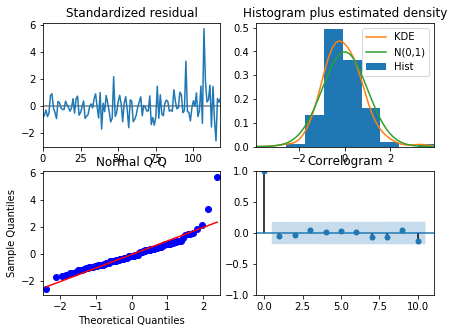

In [53]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

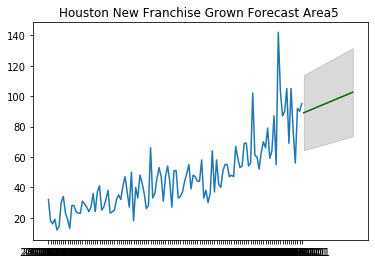

In [54]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecast Area5 ")
plt.show()

In [55]:
confint

array([[ 64.3815443 , 113.78204196],
       [ 64.76660043, 114.56932764],
       [ 65.1532679 , 115.35500199],
       [ 65.54150859, 116.13910313],
       [ 65.93128584, 116.92166769],
       [ 66.32256443, 117.70273092],
       [ 66.71531043, 118.48232673],
       [ 67.1094912 , 119.26048778],
       [ 67.50507527, 120.03724553],
       [ 67.90203231, 120.81263031],
       [ 68.30033307, 121.58667136],
       [ 68.69994933, 122.35939692],
       [ 69.10085383, 123.13083424],
       [ 69.50302024, 123.90100965],
       [ 69.90642313, 124.66994858],
       [ 70.3110379 , 125.43767563],
       [ 70.71684075, 126.20421459],
       [ 71.12380867, 126.96958848],
       [ 71.53191937, 127.73381961],
       [ 71.94115125, 128.49692954],
       [ 72.3514834 , 129.25893921],
       [ 72.76289555, 130.01986888],
       [ 73.17536804, 130.7797382 ],
       [ 73.5888818 , 131.53856626]])

In [24]:
#14

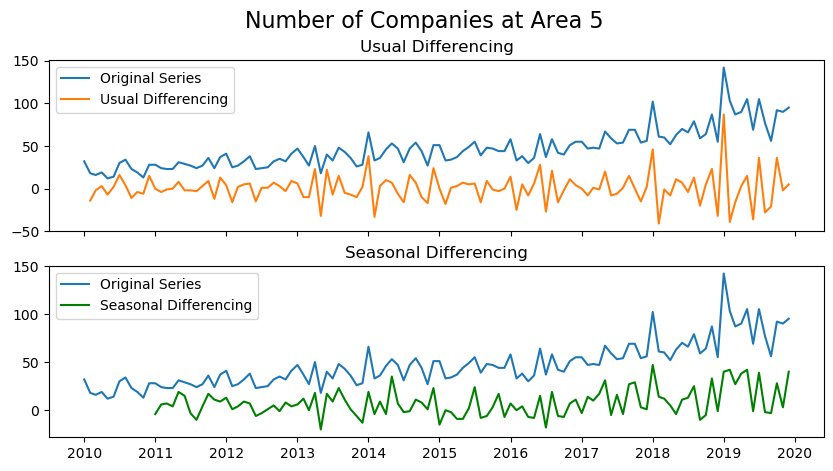

In [58]:
# Import
data = pd.read_csv('2010_zip_5_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Companies at Area 5', fontsize=16)
plt.show()

In [59]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=863.306, BIC=876.716, Time=2.501 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=883.654, BIC=889.019, Time=0.057 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=877.533, BIC=888.261, Time=1.004 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=878.073, BIC=888.802, Time=0.891 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=910.750, BIC=913.432, Time=0.029 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=879.657, BIC=890.386, Time=0.633 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=865.106, BIC=881.198, Time=3.556 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=866.176, BIC=882.269, Time=8.015 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=866.402, BIC=879.812, Time=1.731 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=867.113, BIC=885.888, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -426.653
Date:                            Sun, 29 Mar 2020   AIC                            863.306
Time:                                    23:09:09   BIC                            876.716
Sample:                                         0   HQIC                           868.743
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2166      0.379      0.571      0.568      -0.527       0.960
ar.L1          0.9719      0.054     17.983      0.000       0.866       1.078
ma.L1         -0.8364      0.098     -8.498      0.000      -1.029      -0.644
ma.S.L12      -0.6036      0.115     -5.270      0.000      -0.828      -0.379
sigma2       150.6427     19.269      7.818      0.000     112.876     188.409
===================================================================================
Ljung-Box (Q):                       40.51   Jarque-Bera (JB):                26.13
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

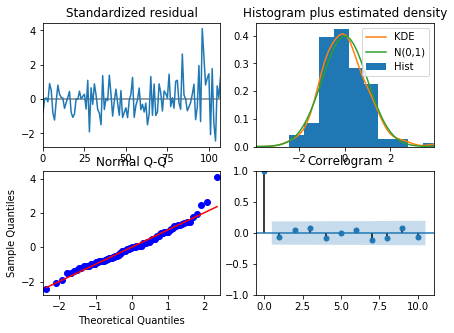

In [60]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

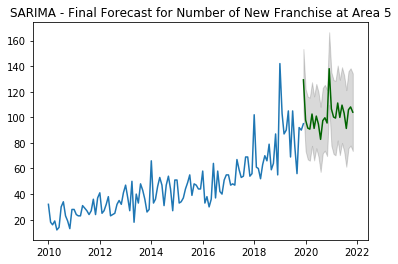

In [61]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast for Number of New Franchise at Area 5")
plt.show()

In [62]:
confint

array([[105.23888862, 153.35148527],
       [ 73.60073924, 122.15287585],
       [ 67.08605729, 116.04975075],
       [ 66.08689515, 115.43618453],
       [ 77.71187354, 127.42264176],
       [ 66.30677599, 116.35659158],
       [ 75.77602625, 126.14400239],
       [ 69.36557391, 120.03224238],
       [ 57.3031163 , 108.25031421],
       [ 71.82849813, 123.03926598],
       [ 73.91979777, 125.37828727],
       [ 69.69754181, 121.38893237],
       [109.56405392, 166.48747419],
       [ 77.88921735, 135.2679452 ],
       [ 71.33892944, 129.14443824],
       [ 70.30523068, 128.51099428],
       [ 81.89672546, 140.47804998],
       [ 70.45917766, 129.39305119],
       [ 79.89698891, 139.16194662],
       [ 73.45608496, 133.03208774],
       [ 61.36413802, 121.23246283],
       [ 75.86096697, 136.00410753],
       [ 77.92462382, 138.32620048],
       [ 73.67560867, 134.32028624]])

In [47]:
#15

In [63]:
# Import Data
data = pd.read_csv('2010_zip_5_monthly_data.csv', parse_dates=['date'], index_col='date')

In [64]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [65]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=865.306, BIC=881.398, Time=3.424 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=885.654, BIC=893.701, Time=0.120 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=879.533, BIC=892.944, Time=1.187 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=880.073, BIC=893.484, Time=1.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=912.750, BIC=918.114, Time=0.337 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=881.657, BIC=895.068, Time=0.831 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=867.106, BIC=885.881, Time=4.036 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=867.996, BIC=886.771, Time=8.675 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=868.402, BIC=884.494, Time=2.149 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=869.115, BIC=890.572, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -426.653
Date:                            Sun, 29 Mar 2020   AIC                            865.306
Time:                                    23:11:23   BIC                            881.398
Sample:                                01-01-2010   HQIC                           871.831
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.2166      0.381      0.568      0.570      -0.530       0.963
seasonal_index    -0.0004   1.25e+05  -2.93e-09      1.000   -2.46e+05    2.46e+05
ar.L1              0.9719      0.054     17.982      0.000       0.866       1.078
ma.L1             -0.8364      0.099     -8.479      0.000      -1.030      -0.643
ma.S.L12          -0.6036      0.115     -5.270      0.000      -0.828      -0.379
sigma2           150.6428     19.274      7.816      0.000     112.867     188.419
===================================================================================
Ljung-Box (Q):                       40.51   Jarque-Bera (JB):                26.13
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""